In [12]:
import pandas as pd
from sklearn import preprocessing

df= pd.read_csv('C:\\Users\\USER\\Desktop\\final .csv')
dfDummies = pd.get_dummies(df['Purpose'], prefix = 'category')
df = pd.concat([df, dfDummies], axis=1)
le = preprocessing.LabelEncoder()
df['Loan Status'] = le.fit_transform(df['Loan Status'])
df['Home Ownership'] = le.fit_transform(df['Home Ownership'])
df['Term'] = le.fit_transform(df['Term'])
y=df['Loan Status']
x=df.drop(['Loan Status', 'Purpose'], axis = 1) 
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,...,category_Medical Bills,category_Other,category_Take a Trip,category_major_purchase,category_moving,category_other,category_renewable_energy,category_small_business,category_vacation,category_wedding
0,1,445412,1,709.000000,1167493.000,8.0,1,Home Improvements,5214.74,17.2,...,0,0,0,0,0,0,0,0,0,0
1,1,262328,1,724.620939,1474407.797,15.0,1,Debt Consolidation,33295.98,21.1,...,0,0,0,0,0,0,0,0,0,0
2,1,99999999,1,741.000000,2231892.000,8.0,2,Debt Consolidation,29200.53,14.9,...,0,0,0,0,0,0,0,0,0,0
3,1,347666,0,721.000000,806949.000,3.0,2,Debt Consolidation,8741.90,12.0,...,0,0,0,0,0,0,0,0,0,0
4,1,176220,1,724.620939,1339653.909,5.0,3,Debt Consolidation,20639.70,6.1,...,0,0,0,0,0,0,0,0,0,0
5,0,206602,1,729.000000,896857.000,15.0,1,Debt Consolidation,16367.74,17.3,...,0,0,0,0,0,0,0,0,0,0
6,1,217646,1,730.000000,1184194.000,0.5,1,Debt Consolidation,10855.08,19.6,...,0,0,0,0,0,0,0,0,0,0
7,0,648714,0,695.483727,1272332.355,0.5,1,Buy House,14806.13,8.2,...,0,0,0,0,0,0,0,0,0,0
8,1,548746,1,678.000000,2559110.000,2.0,3,Debt Consolidation,18660.28,22.6,...,0,0,0,0,0,0,0,0,0,0
9,1,215952,1,739.000000,1454735.000,0.5,3,Debt Consolidation,39277.75,13.9,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1) 
  
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)



Gaussian Naive Bayes model accuracy(in %): 34.8925


In [3]:
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the test set: Cross Validation Score = 0.7281


In [ ]:
'''''from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)
predictions = rf.predict(X_train)
# Calculate the absolute errors
errors = abs(predictions - y_test[1])
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [5]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.7456


In [9]:

def cross_val1(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()
def fit_and_evaluate1(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(given)
    model_cross = cross_val(X_train, y_train, model)
    return model_pred
    

In [12]:
''''from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.7718


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

In [16]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20 

[14:26:58] 60000x29 matrix with 716408 entries loaded from dtrain.svm
[14:26:58] 40000x29 matrix with 477828 entries loaded from dtest.svm


In [ ]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, prediction).ravel()
print(tneg,fpos,fneg,tpos)

In [11]:
''''df.dropna(subset=['Loan Status'], inplace = True)
le = preprocessing.LabelEncoder()
df['Loan Status'] = le.fit_transform(df['Loan Status'])

q=df.corr()['Loan Status'].sort_values(ascending=False)



Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Months since last delinquent    53141
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [13]:
''''df.dropna(subset=['Loan Status'], inplace = True)
le = preprocessing.LabelEncoder()
df['Loan Status'] = le.fit_transform(df['Loan Status'])
df['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
df.head()



SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-1e527fb8bc51>, line 6)

In [13]:
''''df['Years in current job']=df['Years in current job'].map({'8 years':8, '10+ years':15, '3 years':3, '5 years':5, '< 1 year':0.5, '2 years':2, '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})
df['Credit Score']=df['Credit Score'].apply(lambda v:(v/10) if v>850 else v)
df['Credit Score'].describe()

count    80846.000000
mean       716.293447
std         28.297164
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

In [15]:
'''''m = df[df['Years in current job'].isna()].index
q = df[df['Annual Income'].isna()].index
q=list(q)
m=list(m)
for i in m:
    for j in q:
        if j==i:
            df['Years in current job'][j]=0
            df['Annual Income'][j]=0
df['Annual Income'] = df['Annual Income'].fillna((df['Annual Income'].mean()))
df['Years in current job'].fillna(0, inplace=True)
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mode()[0])

In [16]:
''''import matplotlib.pyplot as plt


In [10]:
''''df.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


In [17]:
df


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412,0,709.0,1.167493e+06,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328,0,NaN,1.364605e+06,15.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999,0,741.0,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666,1,721.0,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220,0,NaN,1.364605e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602,0,729.0,8.968570e+05,15.0,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646,0,730.0,1.184194e+06,0.5,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,0,648714,1,NaN,1.364605e+06,0.5,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746,0,678.0,2.559110e+06,2.0,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,1,215952,0,739.0,1.454735e+06,0.5,Rent,Debt Consolidation,39277.75,13.9,NaN,20,0,669560,1021460.0,0.0,0.0


In [19]:
df.drop(['Months since last delinquent'], axis=1)
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412,0,709.0,1.167493e+06,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328,0,NaN,1.364605e+06,15.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999,0,741.0,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666,1,721.0,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220,0,NaN,1.364605e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602,0,729.0,8.968570e+05,15.0,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646,0,730.0,1.184194e+06,0.5,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,0,648714,1,NaN,1.364605e+06,0.5,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746,0,678.0,2.559110e+06,2.0,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,1,215952,0,739.0,1.454735e+06,0.5,Rent,Debt Consolidation,39277.75,13.9,NaN,20,0,669560,1021460.0,0.0,0.0


In [25]:
df=df.drop(['Months since last delinquent'], axis=1)

In [26]:
print(df.describe())


         Loan Status  Current Loan Amount           Term  Credit Score  \
count  100000.000000         1.000000e+05  100000.000000  80846.000000   
mean        0.773610         1.176045e+07       0.277920    716.293447   
std         0.418496         3.178394e+07       0.447976     28.297164   
min         0.000000         1.080200e+04       0.000000    585.000000   
25%         1.000000         1.796520e+05       0.000000    703.000000   
50%         1.000000         3.122460e+05       0.000000    722.000000   
75%         1.000000         5.249420e+05       1.000000    738.000000   
max         1.000000         1.000000e+08       1.000000    751.000000   

       Annual Income  Years in current job   Monthly Debt  \
count   1.000000e+05         100000.000000  100000.000000   
mean    1.364605e+06              7.240450   18472.412336   
std     9.801005e+05              5.690289   12174.992609   
min     0.000000e+00              0.000000       0.000000   
25%     9.180230e+05        

In [37]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Credit Score    19154
Bankruptcies      204
dtype: int64

In [28]:
df=df.drop(['Tax Liens'], axis=1)

In [32]:
q=df.corr()['Loan Status'].sort_values(ascending=False)
print(q)

Loan Status                  1.000000
Current Loan Amount          0.194633
Credit Score                 0.108485
Annual Income                0.051102
Years of Credit History      0.023705
Years in current job         0.018572
Current Credit Balance       0.009663
Maximum Open Credit          0.008407
Bankruptcies                 0.006584
Number of Credit Problems   -0.002358
Monthly Debt                -0.007916
Number of Open Accounts     -0.011949
Term                        -0.110637
Name: Loan Status, dtype: float64


G:\scikit\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
G:\scikit\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


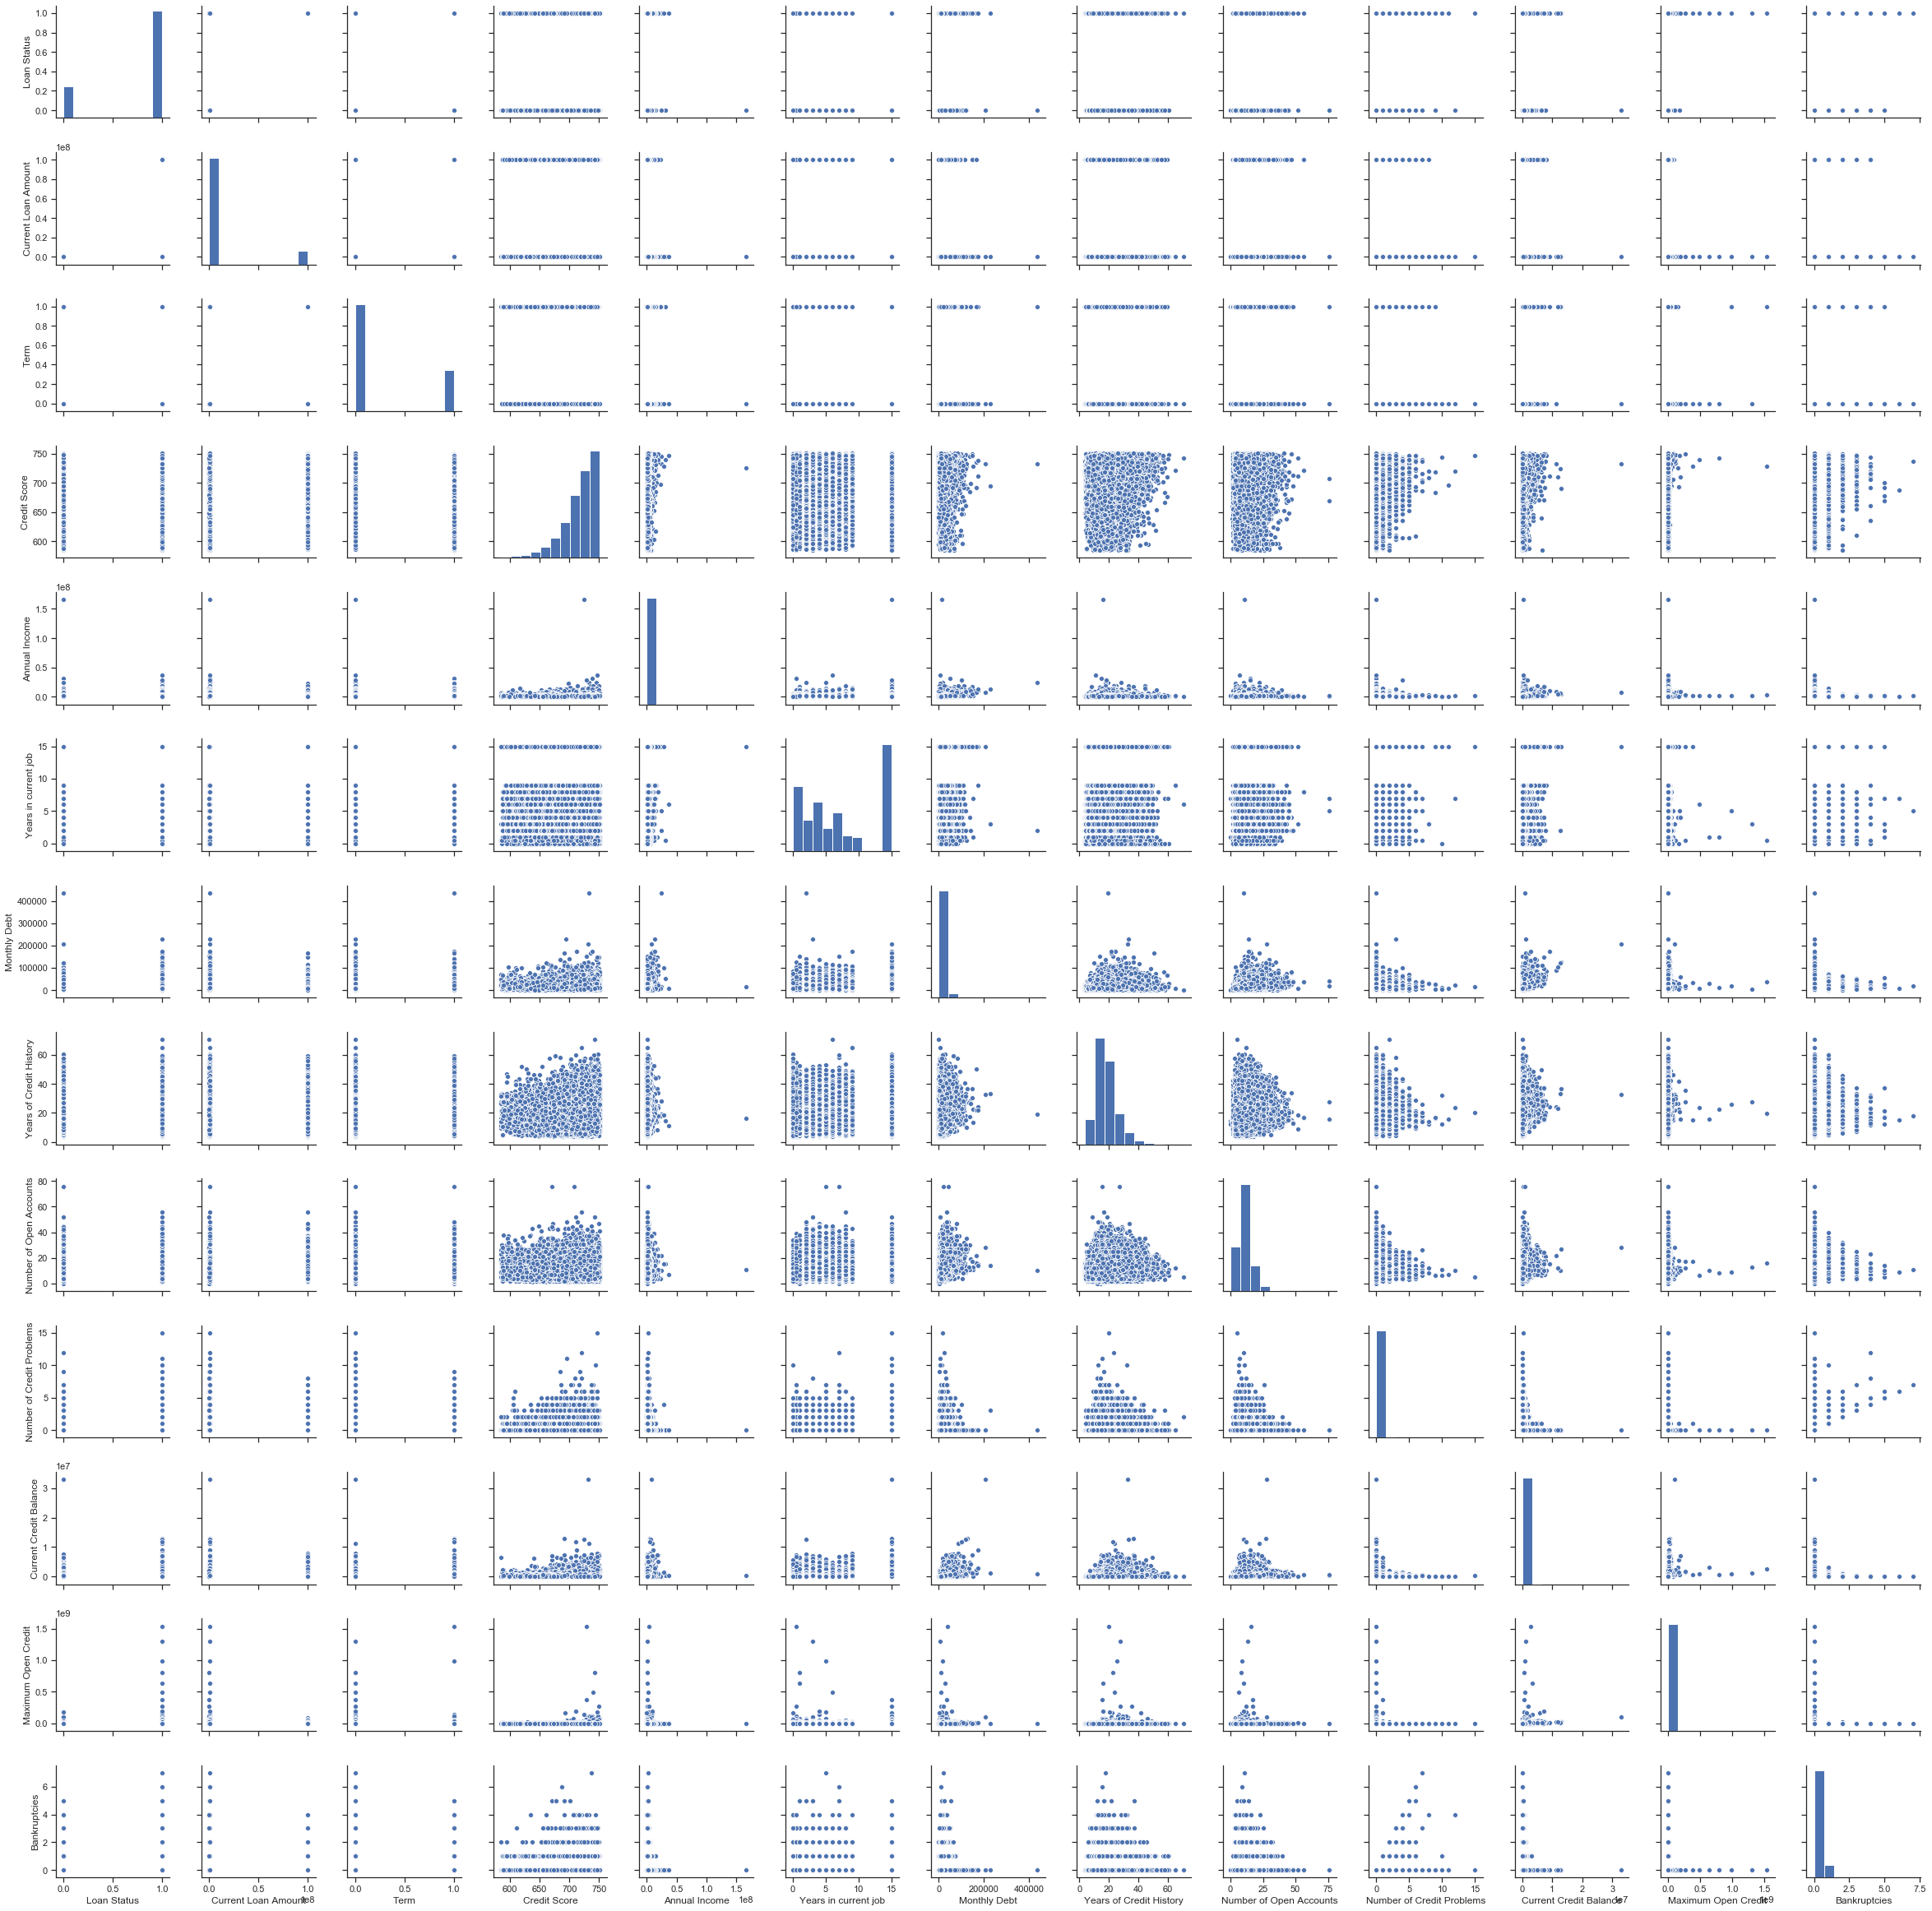

In [34]:
sns.pairplot(df)

In [35]:
print(df.corr())

                           Loan Status  Current Loan Amount      Term  \
Loan Status                   1.000000             0.194633 -0.110637   
Current Loan Amount           0.194633             1.000000 -0.059006   
Term                         -0.110637            -0.059006  1.000000   
Credit Score                  0.108485             0.134951 -0.465211   
Annual Income                 0.051102             0.017858  0.081014   
Years in current job          0.018572             0.001174  0.080774   
Monthly Debt                 -0.007916            -0.006643  0.158641   
Years of Credit History       0.023705             0.019282  0.041505   
Number of Open Accounts      -0.011949             0.001478  0.082605   
Number of Credit Problems    -0.002358            -0.002795 -0.026160   
Current Credit Balance        0.009663             0.003880  0.104719   
Maximum Open Credit           0.008407            -0.001270  0.008349   
Bankruptcies                  0.006584            -

In [42]:
missing2 = df.Bankruptcies.value_counts()[1]
print(missing2)

10475


In [44]:
print(df['Annual Income'].describe())

count    1.000000e+05
mean     1.364605e+06
std      9.801005e+05
min      0.000000e+00
25%      9.180230e+05
50%      1.353009e+06
75%      1.512704e+06
max      1.655574e+08
Name: Annual Income, dtype: float64


In [45]:
cd = df.corr()['Credit Score'].sort_values(ascending=False)
print(cd)


Credit Score                 1.000000
Current Loan Amount          0.134951
Loan Status                  0.108485
Years of Credit History      0.077718
Maximum Open Credit          0.017392
Annual Income               -0.005092
Current Credit Balance      -0.015964
Years in current job        -0.016606
Number of Open Accounts     -0.030063
Bankruptcies                -0.034479
Number of Credit Problems   -0.047260
Monthly Debt                -0.091347
Term                        -0.465211
Name: Credit Score, dtype: float64
